In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

## PART 1: Attack(DDOS)/ Benign        

In [5]:
df2=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2.head()

Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1             109                   1                        1  ...   
2              52                   1                        1  ...   
3              34                   1                        1  ...   
4               3                   2                        0  ...   

    min_seg_size_forward  Active Mean   Active Std   Active Max   Active Min  \
0                     20          0.0          0.0            0            0   
1                     20          0.0          0.0            0            0   
2                     20          0.0          0.0            0            0   
3                     20          0.0          0.0            0            0   
4                     20          0.0          0.0            0            0   

   Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0        0.0        0.0          0          0  BENIGN  
1        0.0        0.0          0          0  BENIGN  
2        0.0        0.0          0          0  BENIGN  
3        0.0        0.0          0          0  BENIGN  
4        0.0        0.0          0          0  BENIGN  

[5 rows x 85 columns]

In [6]:
df2.shape

(225745, 85)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

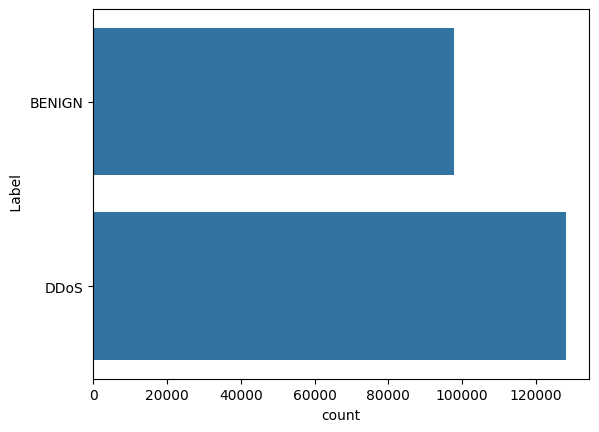

In [8]:
sns.countplot(df2[' Label'])
plt.show()

In [9]:
df2.columns = df2.columns.str.strip()  # Remove leading and trailing spaces|
# rename_column = {'Max Packet Length':'Packet Length Max', 
#                  'Init_Win_bytes_forward':'Init Fwd Win Bytes',
#                  'Total Length of Bwd Packets':'Bwd Packets Length Total',
#                  'Min Packet Length':'Packet Length Min',
#                  'min_seg_size_forward':'Fwd Seg Size Min',
#                  'act_data_pkt_fwd':'Fwd Act Data Packets',
#                  'Average Packet Size': 'Avg Packet Size',
#                  'Init_Win_bytes_backward':'Init Bwd Win Bytes',
#                  'Total Length of Fwd Packets':'Fwd Packets Length Total',              
#                  }
# df2.rename(columns=rename_column, inplace=True)

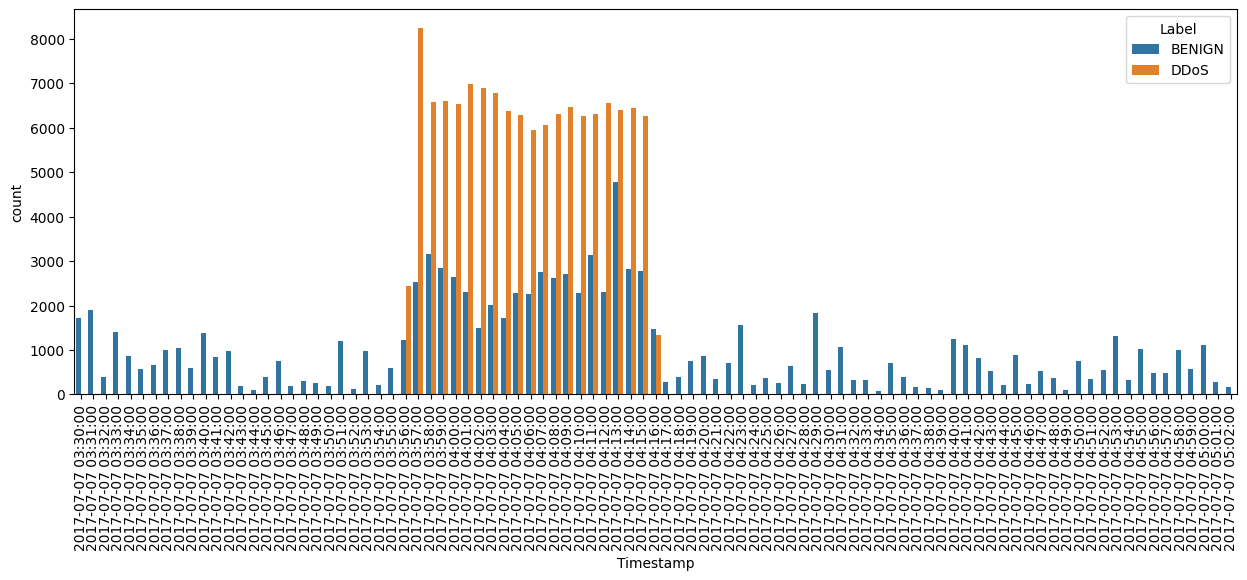

In [10]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
plt.figure(figsize=(15,5))
sns.countplot(df2,x='Timestamp', hue='Label')
plt.xticks(rotation=90)
plt.show()

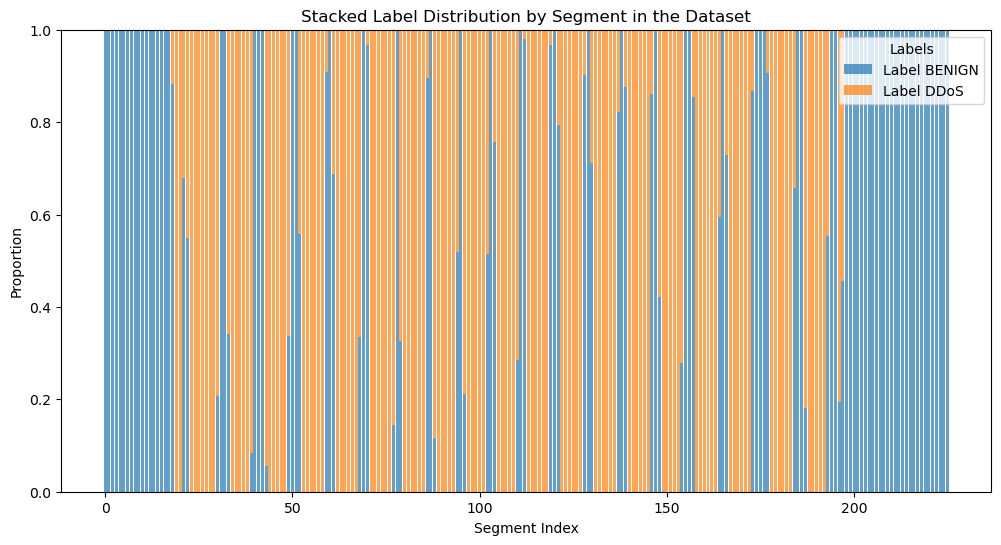

In [8]:
# Define the size of each segment
segment_size = 1000

# Calculate the total number of segments
num_segments = len(df2) // segment_size

# Create an empty DataFrame to store label distribution for each segment
label_distribution = pd.DataFrame()

# Calculate the label proportion for each segment
for i in range(num_segments):
    segment = df2['Label'][i * segment_size: (i + 1) * segment_size]
    segment_counts = segment.value_counts(normalize=True)  # Calculate proportion
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Handle remaining data by adding an extra segment if necessary
if len(df2) % segment_size != 0:
    segment = df2['Label'][num_segments * segment_size:]
    segment_counts = segment.value_counts(normalize=True)
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Fill NaN values with 0 to indicate that the label is absent in that segment
label_distribution = label_distribution.fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None  # Initial value for bottom parameter in stacked bar
for label in label_distribution.columns:
    plt.bar(label_distribution.index, label_distribution[label], label=f'Label {label}', bottom=bottom, alpha=0.7)
    bottom = (bottom + label_distribution[label]) if bottom is not None else label_distribution[label]

plt.xlabel('Segment Index')
plt.ylabel('Proportion')
plt.title('Stacked Label Distribution by Segment in the Dataset')
plt.legend(title='Labels')
plt.show()

In [11]:
# Columns with all zeros
temp = df2[df2 == 0].count()
df2_zero_columns = temp[temp == df2.shape[0]].index
print(df2_zero_columns)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')


In [12]:
# Checking possible columns that are categorical
categorical_df2 = []
for x in df2.columns:
    count = df2[x].value_counts().count()
    if count < 20:
        print(f"{x}\t: {count}")
        categorical_df2.append(x)

Protocol	: 3
Fwd PSH Flags	: 2
Bwd PSH Flags	: 1
Fwd URG Flags	: 1
Bwd URG Flags	: 1
FIN Flag Count	: 2
SYN Flag Count	: 2
RST Flag Count	: 2
PSH Flag Count	: 2
ACK Flag Count	: 2
URG Flag Count	: 2
CWE Flag Count	: 1
ECE Flag Count	: 2
Down/Up Ratio	: 8
Fwd Avg Bytes/Bulk	: 1
Fwd Avg Packets/Bulk	: 1
Fwd Avg Bulk Rate	: 1
Bwd Avg Bytes/Bulk	: 1
Bwd Avg Packets/Bulk	: 1
Bwd Avg Bulk Rate	: 1
min_seg_size_forward	: 8
Label	: 2


In [13]:
# Checking the values of the suspected categorical columns
for x in categorical_df2:
    print(df2[x].value_counts())
    print()

Protocol
6     192820
17     32871
0         54
Name: count, dtype: int64

Fwd PSH Flags
0    218245
1      7500
Name: count, dtype: int64

Bwd PSH Flags
0    225745
Name: count, dtype: int64

Fwd URG Flags
0    225745
Name: count, dtype: int64

Bwd URG Flags
0    225745
Name: count, dtype: int64

FIN Flag Count
0    225142
1       603
Name: count, dtype: int64

SYN Flag Count
0    218245
1      7500
Name: count, dtype: int64

RST Flag Count
0    225718
1        27
Name: count, dtype: int64

PSH Flag Count
0    146472
1     79273
Name: count, dtype: int64

ACK Flag Count
1    113880
0    111865
Name: count, dtype: int64

URG Flag Count
0    193971
1     31774
Name: count, dtype: int64

CWE Flag Count
0    225745
Name: count, dtype: int64

ECE Flag Count
0    225718
1        27
Name: count, dtype: int64

Down/Up Ratio
0    97309
1    88989
2    21669
5     9989
6     6213
3      745
7      650
4      181
Name: count, dtype: int64

Fwd Avg Bytes/Bulk
0    225745
Name: count, dtype: int64

In [14]:
df2_temp = df2.drop(columns=['Destination IP', 'Source Port', 'Destination Port', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Try to work with Ports

# Dropping columns with only zeros
df2_temp = df2_temp.drop(columns=df2_zero_columns)

# Change flags to boolean type
to_bool = []
for x in df2_temp.columns:
    if "Flag" in x:
        to_bool.append(x)
df2_temp[to_bool] = df2_temp[to_bool].astype('bool')

# Encode Protocol become categorical
df2_temp = pd.get_dummies(df2_temp, columns=['Protocol'])

# Drop any rows with nulls
df2_temp = df2_temp.drop(index=df2_temp[df2_temp.isnull().any(axis=1)].index)

# Drop any rows with infinity
df2_temp = df2_temp.drop(index=df2_temp[df2_temp.isin([np.inf, -np.inf]).any(axis=1)].index)

# Changing Label to 0 and 1
df2_temp['Label'] = df2_temp['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
df2_temp['Label'] = df2_temp['Label'].astype('bool')

# Changing timestamp to datetime
# df2_temp['Timestamp'] = pd.to_datetime(df2_temp['Timestamp'])
# df2_temp.info()

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Standardizing numerical columns
numerical_columns = df2_temp.select_dtypes('number').columns
scaler = MinMaxScaler()
df2_temp[numerical_columns] = scaler.fit_transform(df2_temp[numerical_columns])

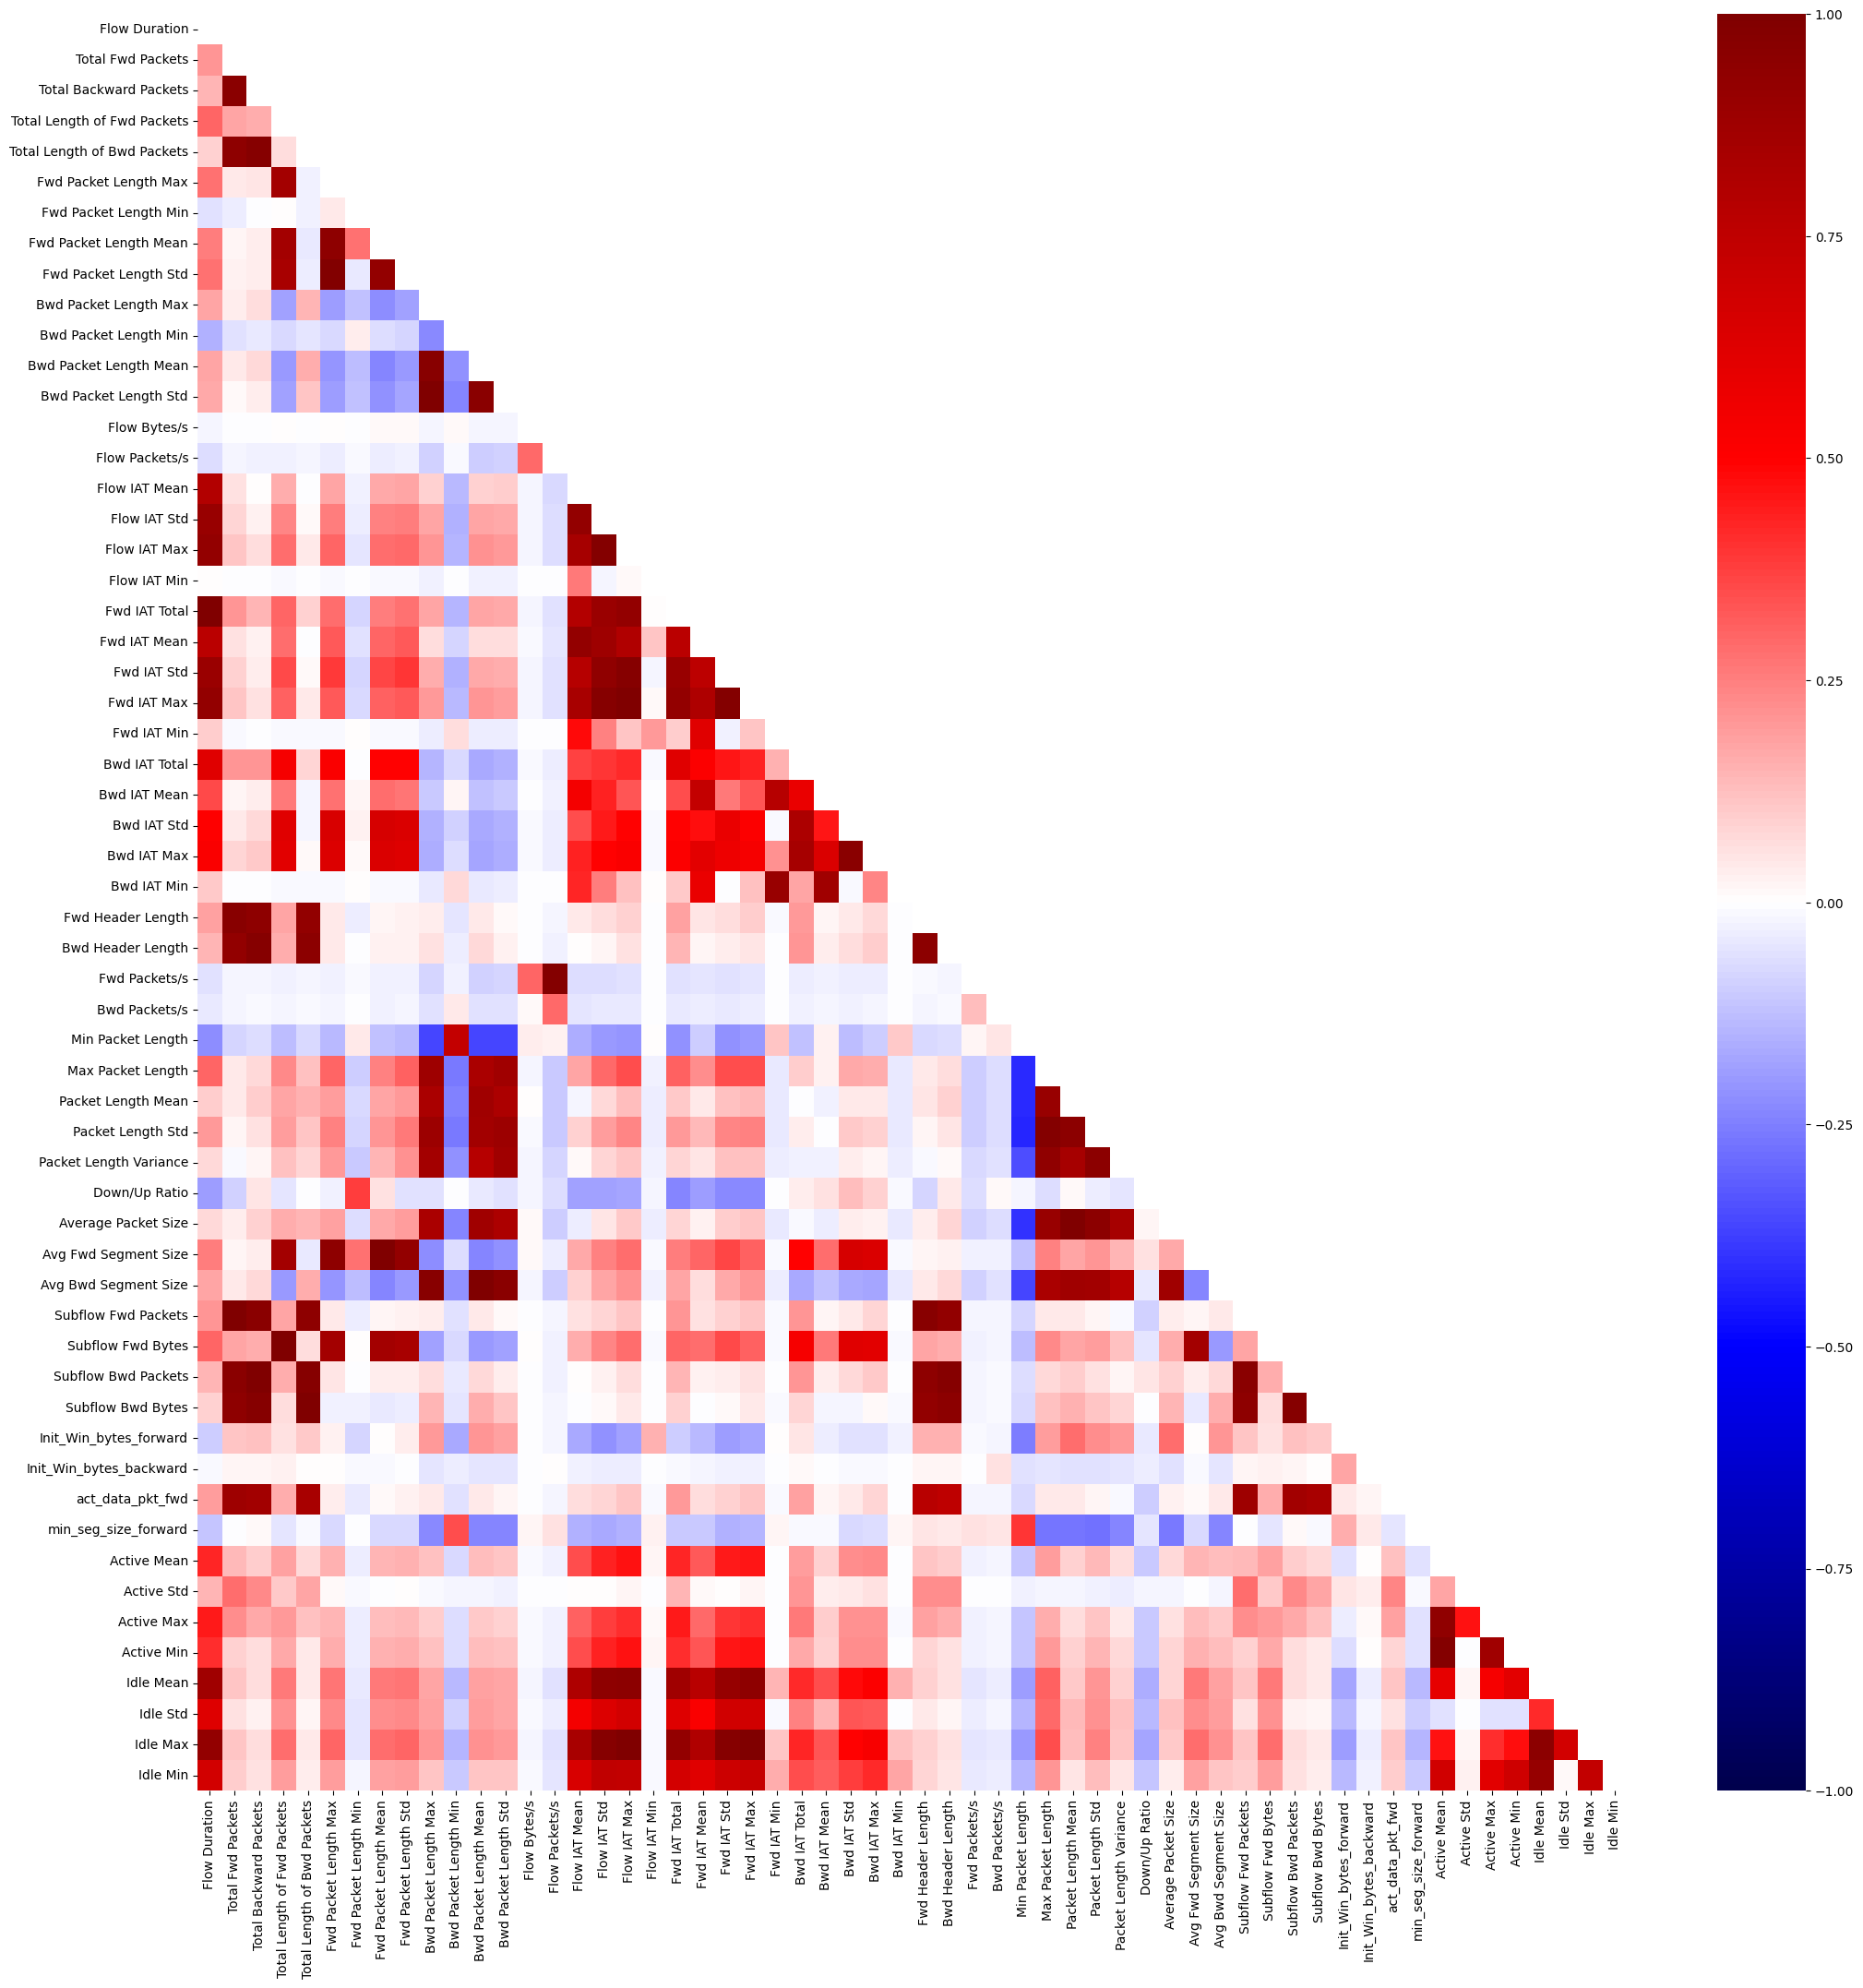

In [17]:
corr = df2_temp.select_dtypes('number').corr()
mask = np.triu(corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1, vmin=-1)
plt.show()

In [18]:
iterations = corr.columns
variance = df2_temp.select_dtypes('number').var()
mask = np.triu(corr)
columns_to_drop = set()
print("High Linear Correlations")
for i in range(len(iterations)):
    for j in range(i):
        if abs(corr.iloc[i,j]) >= 0.8:
            print(f"{iterations[i]} v {iterations[j]}: {corr.iloc[i,j]}\n")
            if variance[iterations[i]] > variance[iterations[j]]:
                columns_to_drop.add(iterations[j])
            else:
                columns_to_drop.add(iterations[i])
        else:
            mask[i,j] = 1

print("Columns to drop:\n")
print(columns_to_drop)            

High Linear Correlations
Total Backward Packets v Total Fwd Packets: 0.9567136244127207

Total Length of Bwd Packets v Total Fwd Packets: 0.9384697830686014

Total Length of Bwd Packets v Total Backward Packets: 0.9704220582473434

Fwd Packet Length Max v Total Length of Fwd Packets: 0.852425217278092

Fwd Packet Length Mean v Total Length of Fwd Packets: 0.8584367853293069

Fwd Packet Length Mean v Fwd Packet Length Max: 0.940953183923084

Fwd Packet Length Std v Total Length of Fwd Packets: 0.8391376344888932

Fwd Packet Length Std v Fwd Packet Length Max: 0.9916724305462838

Fwd Packet Length Std v Fwd Packet Length Mean: 0.9196308911619563

Bwd Packet Length Mean v Bwd Packet Length Max: 0.9614403503257839

Bwd Packet Length Std v Bwd Packet Length Max: 0.9926829726002745

Bwd Packet Length Std v Bwd Packet Length Mean: 0.956005295562481

Flow IAT Std v Flow Duration: 0.8991755549188583

Flow IAT Std v Flow IAT Mean: 0.9175261684823351

Flow IAT Max v Flow Duration: 0.9202541443622

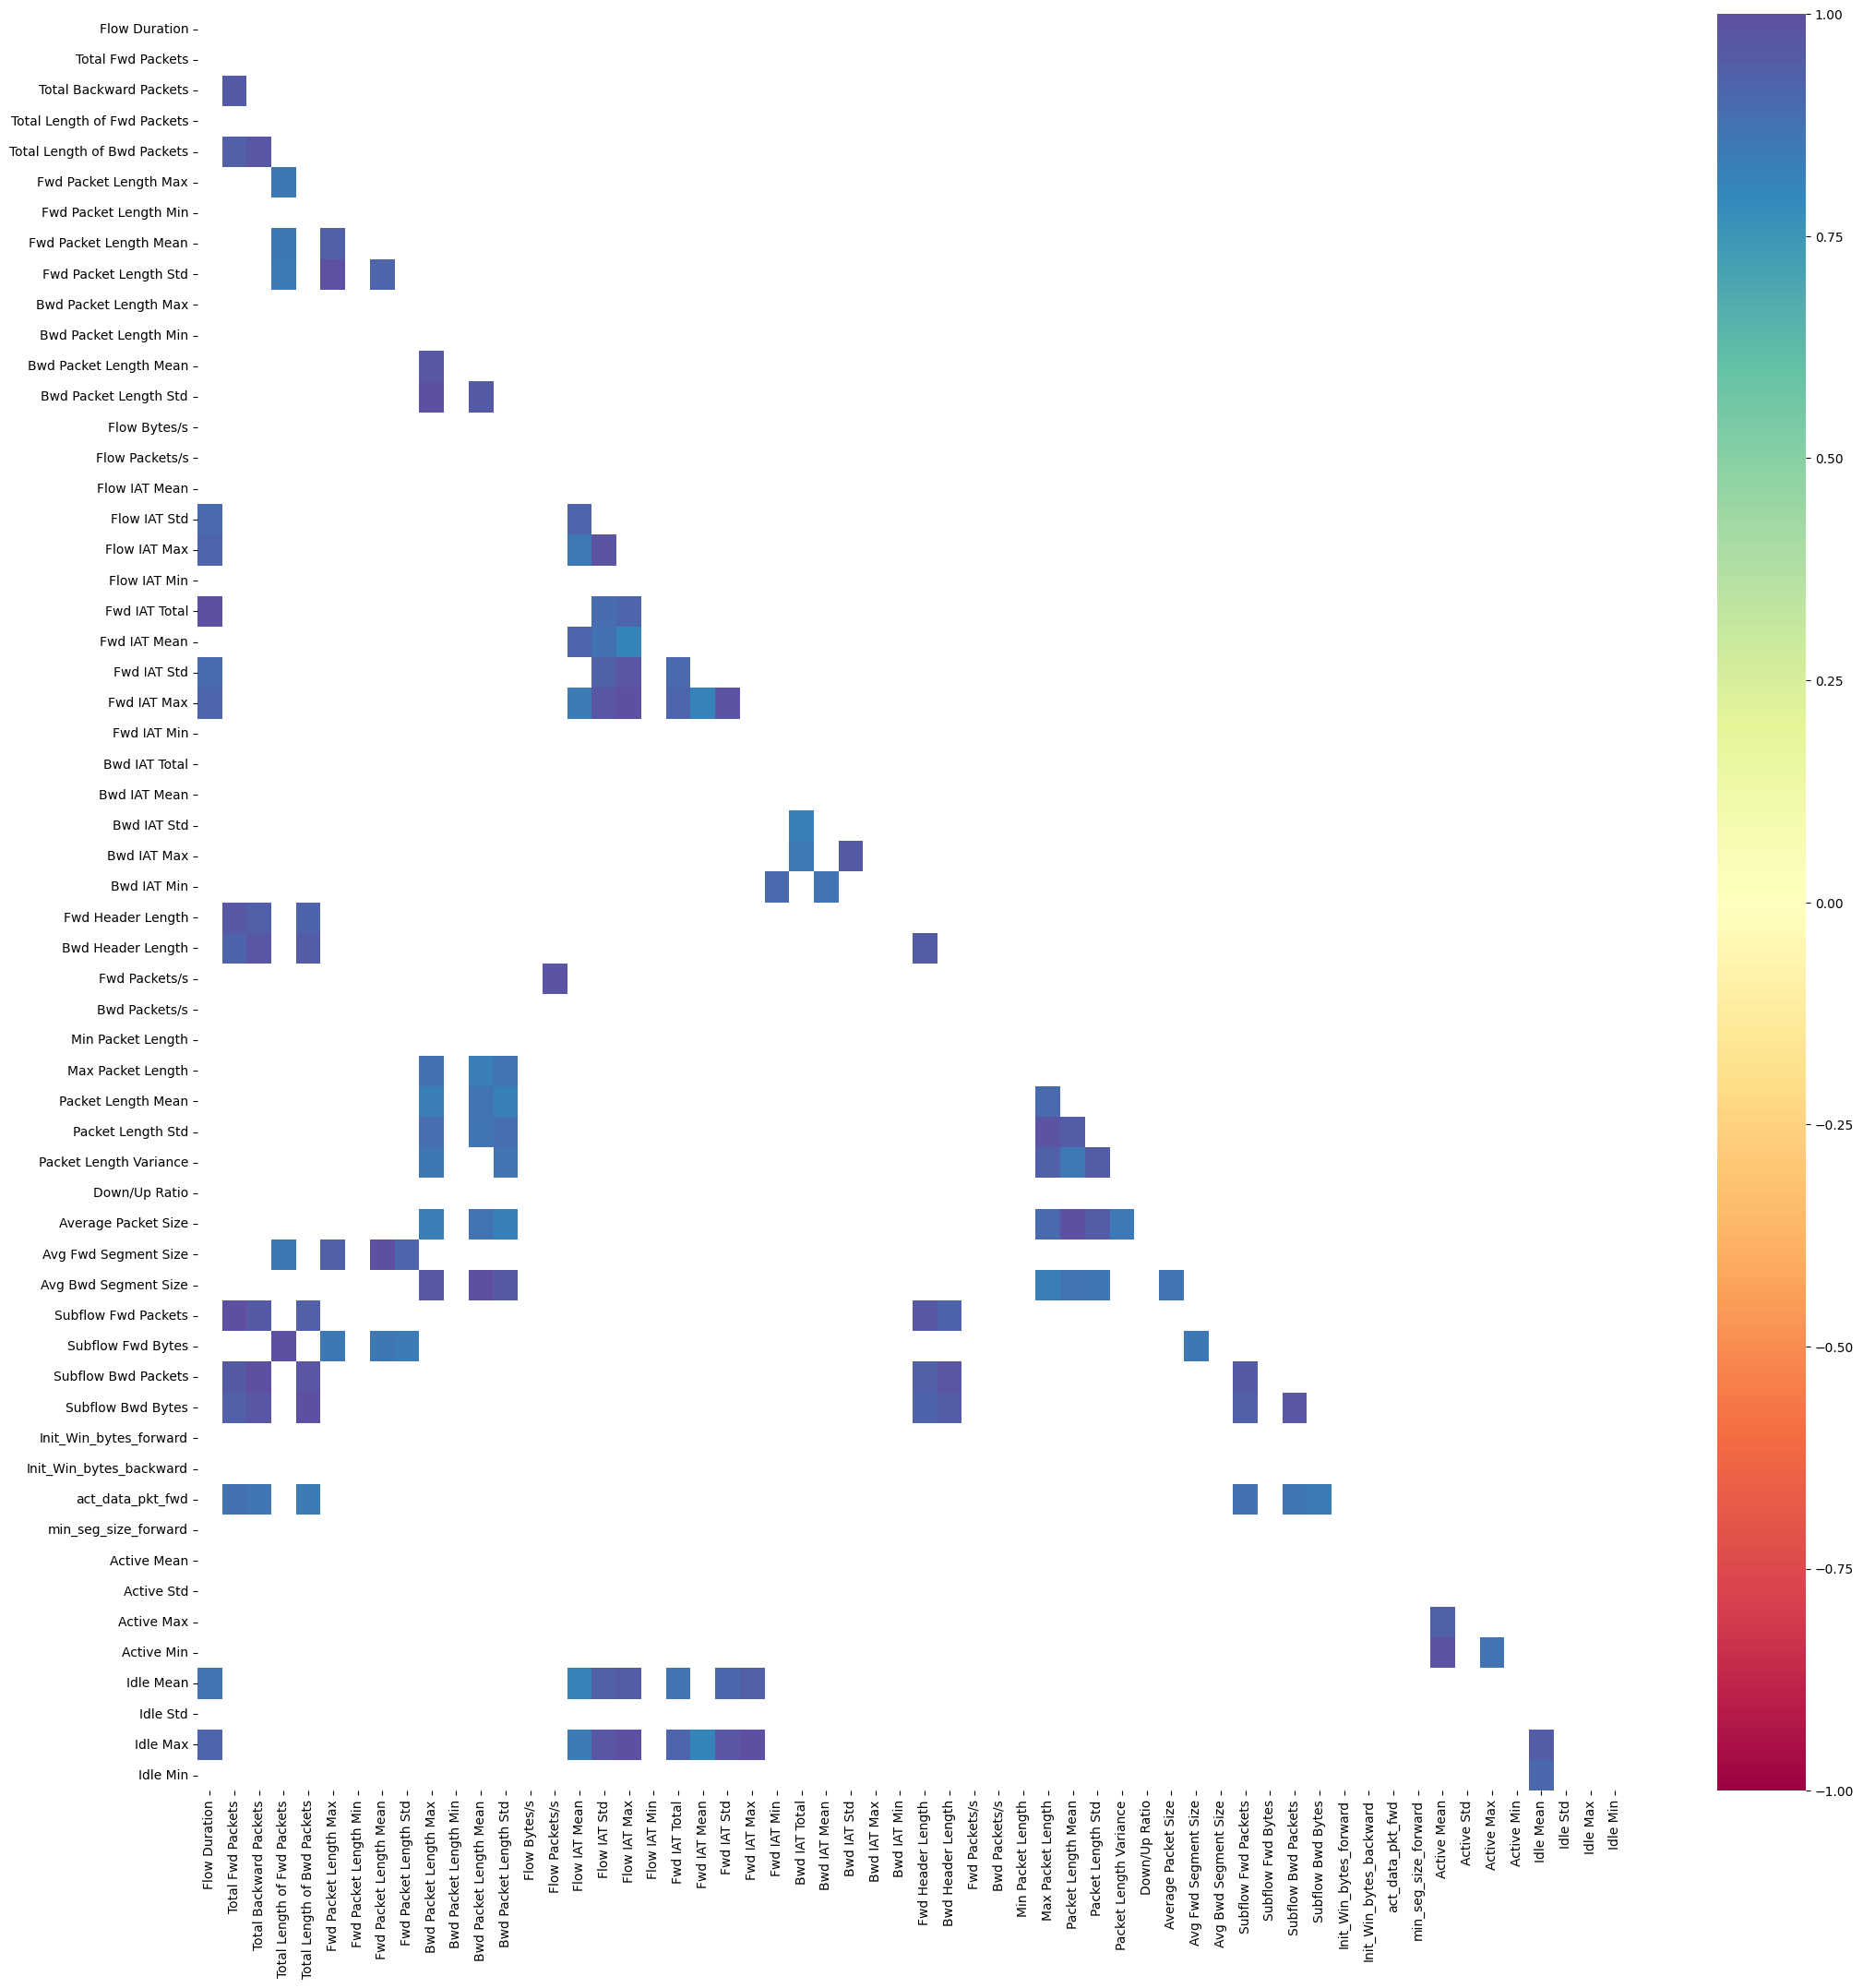

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=1, vmin=-1)
plt.show()

In [20]:
df2_temp = df2_temp.drop(columns=columns_to_drop)
df2_temp.head()

Fwd Packet Length Max  Fwd Packet Length Min  Bwd Packet Length Min  \
0               0.000514               0.004076                0.00000   
1               0.000514               0.004076                0.00411   
2               0.000514               0.004076                0.00411   
3               0.000514               0.004076                0.00411   
4               0.000514               0.004076                0.00000   

   Flow Bytes/s  Flow IAT Min  Fwd IAT Total  Bwd IAT Total  Bwd IAT Mean  \
0      0.007685  1.401869e-07   2.500000e-08            0.0           0.0   
1      0.005817  1.130841e-06   0.000000e+00            0.0           0.0   
2      0.005875  5.981308e-07   0.000000e+00            0.0           0.0   
3      0.005933  4.299065e-07   0.000000e+00            0.0           0.0   
4      0.007685  1.401869e-07   2.500000e-08            0.0           0.0   

   Fwd PSH Flags  Fwd Header Length  ...  Init_Win_bytes_forward  \
0          False           0.001015  ...                0.000519   
1          False           0.000508  ...                0.000458   
2          False           0.000508  ...                0.000458   
3          False           0.000508  ...                0.000488   
4          False           0.001015  ...                0.000504   

   Init_Win_bytes_backward  min_seg_size_forward  Active Std  Active Max  \
0                 0.000000              0.384615         0.0         0.0   
1                 0.003922              0.384615         0.0         0.0   
2                 0.003922              0.384615         0.0         0.0   
3                 0.005035              0.384615         0.0         0.0   
4                 0.000000              0.384615         0.0         0.0   

   Idle Std  Label  Protocol_0  Protocol_6  Protocol_17  
0       0.0  False       False        True        False  
1       0.0  False       False        True        False  
2       0.0  False       False        True        False  
3       0.0  False       False        True        False  
4       0.0  False       False        True        False  

[5 rows x 32 columns]

In [17]:
df2_temp.columns

Index(['Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Min', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Min', 'Fwd IAT Total', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Fwd PSH Flags', 'Bwd Packets/s', 'Min Packet Length',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'ECE Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'min_seg_size_forward', 'Active Std',
       'Active Max', 'Idle Std', 'Label', 'Protocol_0', 'Protocol_6',
       'Protocol_17'],
      dtype='object')

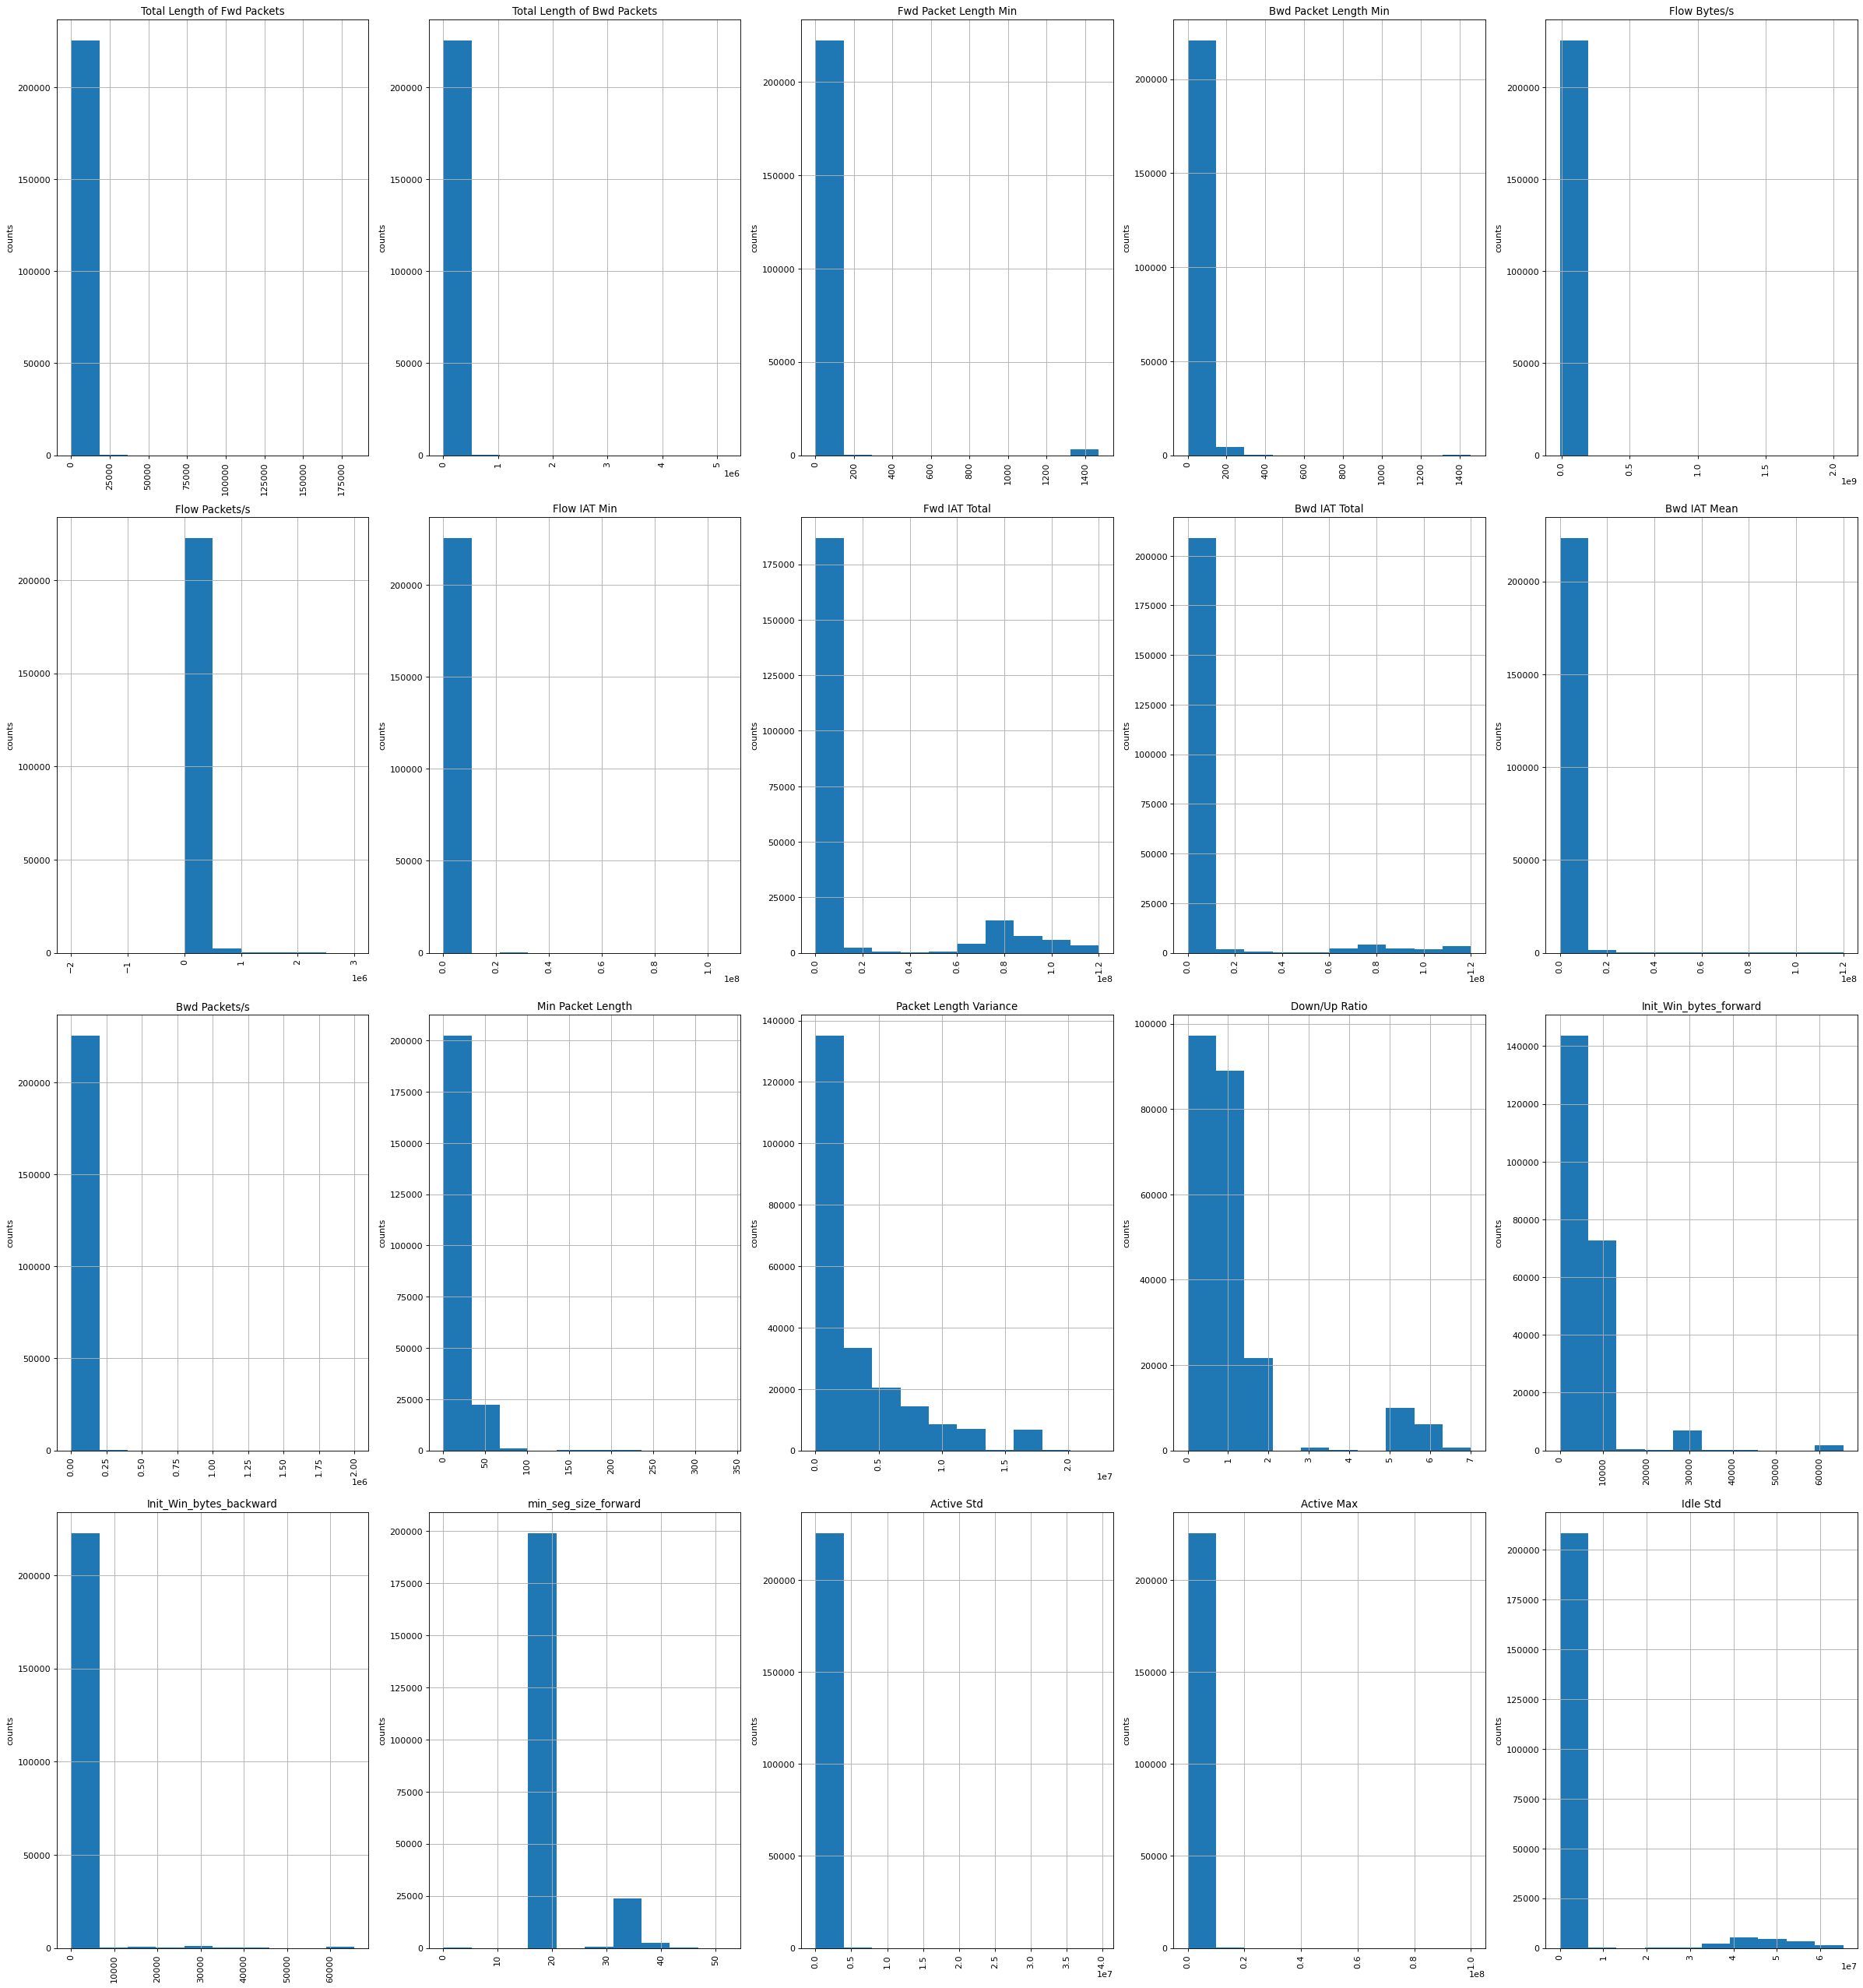

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('number')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    # Set up the figure size dynamically based on the number of graphs
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]}')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnDistribution(df2_temp, 20, 5)

In [28]:
def plotPerColumnScatter(df, nGraphShown, nGraphPerRow):
    columnNames = list(df.select_dtypes('number'))
    nCol = len(columnNames)
    # Ensure nGraphRow is an integer
    nGraphRow = nGraphShown // nGraphPerRow

    # Set up the figure size dynamically based on the number of graphs
    # plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(6 * nGraphPerRow, 8 * nGraphRow)) 
    colormap = plt.cm.get_cmap('plasma')
    graph_counter = 0
    for i in range(min(nCol, nGraphShown)):
        for j in range(i):
            row = graph_counter // nGraphPerRow
            col = graph_counter % nGraphPerRow
            ax[row, col].scatter(df[columnNames[i]], df[columnNames[j]], c=df['Label'], cmap=colormap)
            ax[row, col].set_ylabel(f'{columnNames[j]}')
            ax[row, col].set_xlabel(f'{columnNames[i]}')
            ax[row, col].tick_params(axis='x', rotation=90)
            ax[row, col].set_title(f'{columnNames[i]} vs {columnNames[j]}')
            graph_counter += 1
            if graph_counter >= nGraphShown:
                break
        if graph_counter >= nGraphShown:
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnScatter(df2_temp, 190, 5)

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_56488\2663713465.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('plasma')


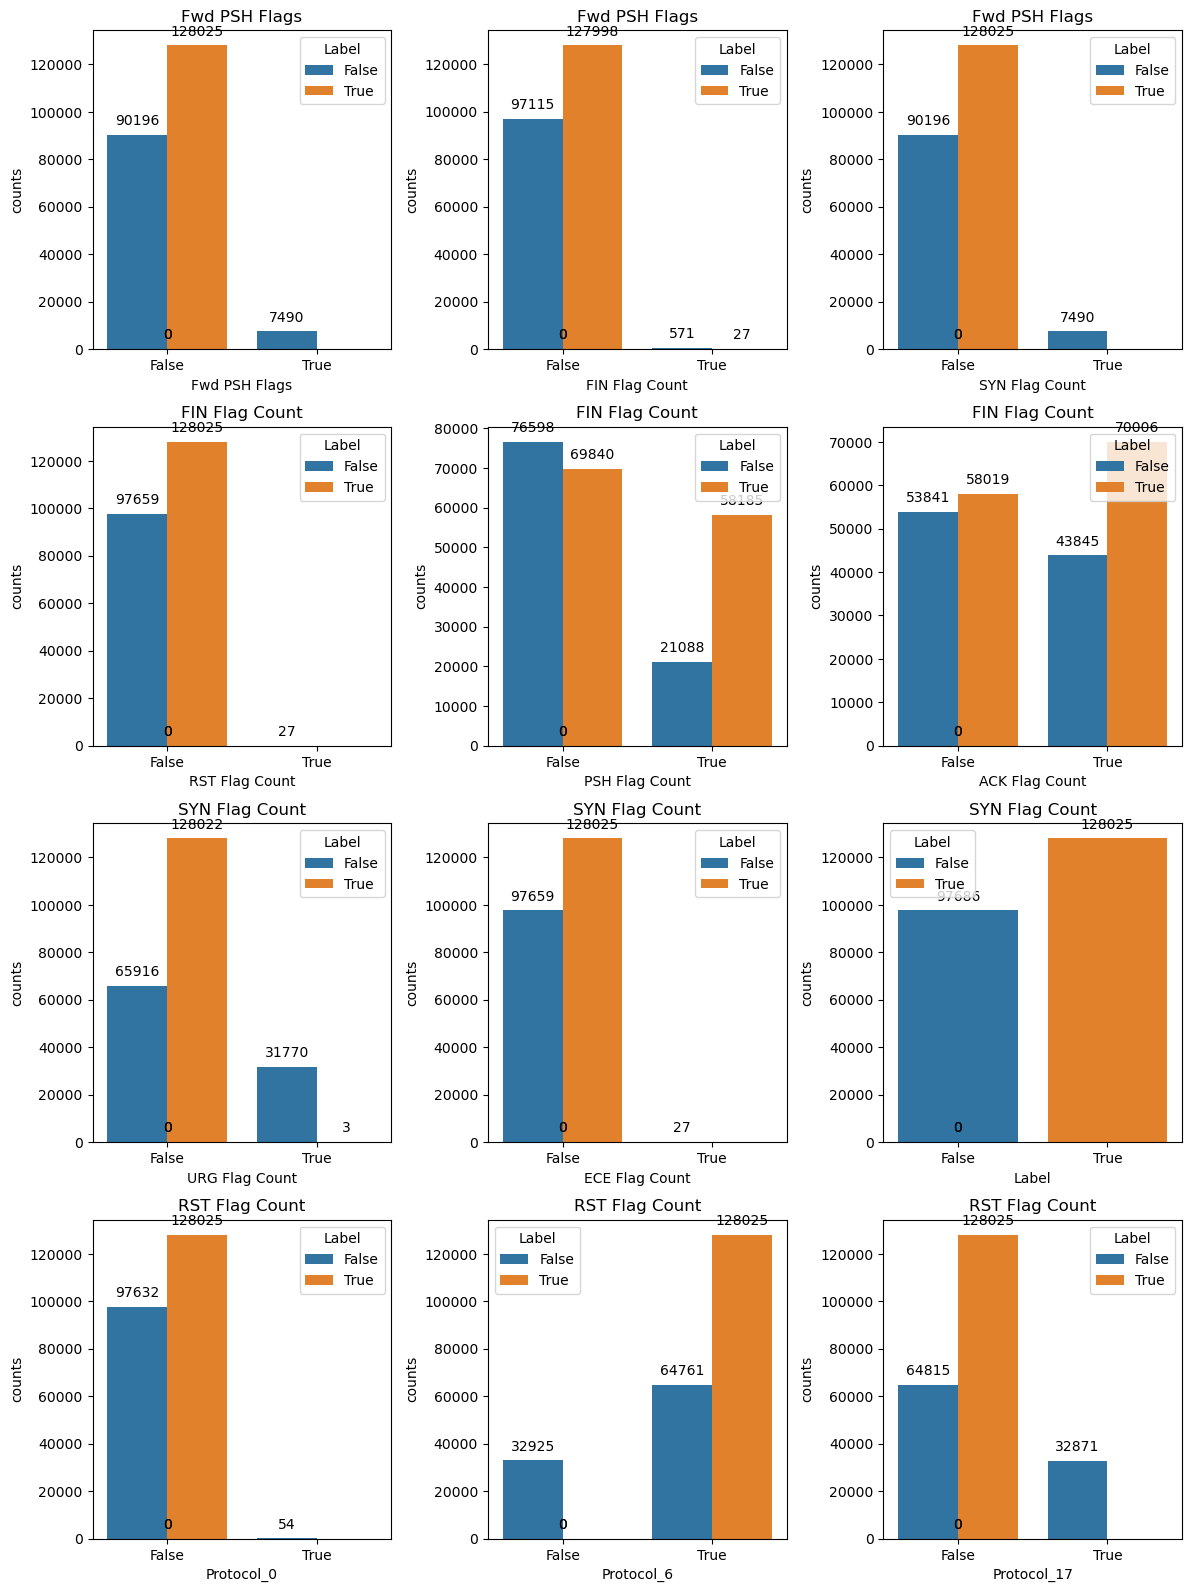

In [32]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnCount(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('bool')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = nGraphShown // nGraphPerRow + (1 if nGraphShown % nGraphPerRow else 0)

    # Set up the figure size dynamically based on the number of graphs
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(4 * nGraphPerRow, 4 * nGraphRow))
    graph_counter = 0
    for i in range(nGraphRow):
        for j in range(nGraphPerRow):
            ax[i,j] = sns.countplot(df, x=columnNames[graph_counter], hue='Label', ax=ax[i, j])
            ax[i,j].set_ylabel('counts')
            ax[i,j].set_title(f'{columnNames[i]}')
            for p in ax[i,j].patches:
                ax[i,j].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')
            graph_counter += 1
            if graph_counter >= min(nGraphShown,nCol):
                break
        if graph_counter >= min(nGraphShown,nCol):
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnCount(df2_temp, 12, 3)

In [21]:
df = df2.drop(columns=['Destination IP', 'Source Port', 'Destination Port', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Dropping columns with only zeros
df = df.drop(columns=df2_zero_columns)

# Drop any rows with nulls
df = df.drop(index=df[df.isnull().any(axis=1)].index)

# Drop any rows with infinity
df = df.drop(index=df[df.isin([np.inf, -np.inf]).any(axis=1)].index)

# Change flags to boolean type
to_bool = []
for x in df.columns:
    if "Flag" in x:
        to_bool.append(x)
df[to_bool] = df[to_bool].astype('bool')

# Dropping high colinear columns
df = df.drop(columns=columns_to_drop)

# Encode Protocol become categorical
# df = pd.get_dummies(df, columns=['Protocol'])

# Changing Label to 0 and 1
df['Label'] = df['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
df['Label'] = df['Label'].astype('bool')

# Changing timestamp to datetime
# df2_temp['Timestamp'] = pd.to_datetime(df2_temp['Timestamp'])
df.shape

(225711, 30)

In [24]:
new_columns = df.columns
print (new_columns)

Index(['Protocol', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow IAT Min',
       'Fwd IAT Total', 'Bwd IAT Total', 'Bwd IAT Mean', 'Fwd PSH Flags',
       'Fwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Std', 'Active Max', 'Idle Std',
       'Label'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=42)

X_train = train.drop(columns='Label')
y_train = train['Label']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [27]:
categorical_column = X_train.select_dtypes('bool').columns
numerical_columns = X_train.select_dtypes('number').columns
ohe = OneHotEncoder(handle_unknown="ignore")
ct = ColumnTransformer(
    [('one_hot_encoder', ohe, ['Protocol']),
     ('standard_scaler', StandardScaler(), numerical_columns),
     ('nothing', 'passthrough', categorical_column)]
)
pca = PCA(2)
selectk = SelectKBest(mutual_info_classif, k=2)
preprocessor = FeatureUnion([('pca', pca), ('selectk', selectk)])

estimator = RandomForestClassifier(random_state=42, max_depth=2, max_features=5)
estimator2 = SVC(kernel="linear")
estimator3 = LogisticRegression()
estimator4 = XGBClassifier(n_estimators=300, max_depth=4)

param_grid= {
    'prediction__n_estimators':[100,300,500,1000]
}

pipeline = Pipeline([('preprocessing', ct), ('prediction', estimator4)])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=2, scoring='accuracy', verbose=1)

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Protocol']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['Protocol', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow IAT Min',
       'Fwd IAT Total', 'Bwd IAT Total', 'Bwd IAT Mean', 'Fwd Header Length',
       'Fwd Packet...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [30]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'prediction__n_estimators': 100}

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

X_test = test.drop(columns='Label')
y_test = test['Label']
prediction = pipeline.predict(X_test)
# prediction = grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test, prediction))

[[24362     3]
 [    3 32060]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     24365
        True       1.00      1.00      1.00     32063

    accuracy                           1.00     56428
   macro avg       1.00      1.00      1.00     56428
weighted avg       1.00      1.00      1.00     56428



## Evaluation with CIC

In [ ]:
df1=pd.read_csv('combined.csv', index_col=0)

rename_column =  {'Packet Length Max': 'Max Packet Length',
                  'Init Fwd Win Bytes':'Init_Win_bytes_forward',
                  'Bwd Packets Length Total':'Total Length of Bwd Packets',
                  'Packet Length Min':'Min Packet Length',
                  'Fwd Seg Size Min':'min_seg_size_forward',
                  'Fwd Act Data Packets':'act_data_pkt_fwd',
                  'Avg Packet Size':'Average Packet Size',
                  'Init Bwd Win Bytes':'Init_Win_bytes_backward',
                  'Fwd Packets Length Total':'Total Length of Fwd Packets'
                }
df1 = df1.rename(columns=rename_column)

In [104]:
# df = df2.drop(columns=['Destination IP', 'Source Port', 'Destination Port', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Dropping columns with only zeros
# df1 = df1.drop(columns=df2_zero_columns)

# Drop any rows with nulls
df1 = df1.drop(index=df1[df1.isnull().any(axis=1)].index)

# Drop any rows with infinity
df1 = df1.drop(index=df1[df1.isin([np.inf, -np.inf]).any(axis=1)].index)

# Change flags to boolean type
to_bool = []
for x in df1.columns:
    if "Flag" in x:
        to_bool.append(x)
df1[to_bool] = df1[to_bool].astype('bool')

# Dropping high colinear columns
# df = df.drop(columns=columns_to_drop)

# Changing Label to 0 and 1
df1['Label'] = df1['Label'].apply(lambda x: 0 if x == "Benign" else 1)
df1['Label'] = df1['Label'].astype('bool')

In [106]:
X_test = df1.drop(columns=['Label','Class'])
y_test = df1['Label']
prediction = pipeline.predict(X_test)
# prediction = grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 97826      5]
 [327936   5604]]
              precision    recall  f1-score   support

       False       0.23      1.00      0.37     97831
        True       1.00      0.02      0.03    333540

    accuracy                           0.24    431371
   macro avg       0.61      0.51      0.20    431371
weighted avg       0.82      0.24      0.11    431371



In [108]:
pipeline_test = Pipeline([('preprocessor', ct), ('pca',pca)])
new_features = pipeline_test.fit_transform(X_train)

In [ ]:
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)
features_reduced = pd.DataFrame(features_reduced, columns=['pca1','pca2'])

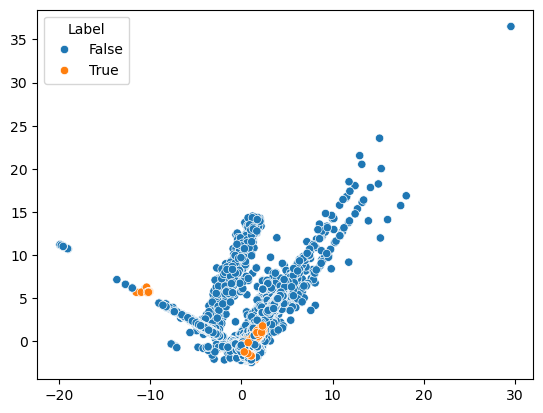

In [115]:
sns.scatterplot(x=new_features[:,0], y=new_features[:,1], hue=y_train)
plt.show()

c:\anaconda\envs\deeplearning\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


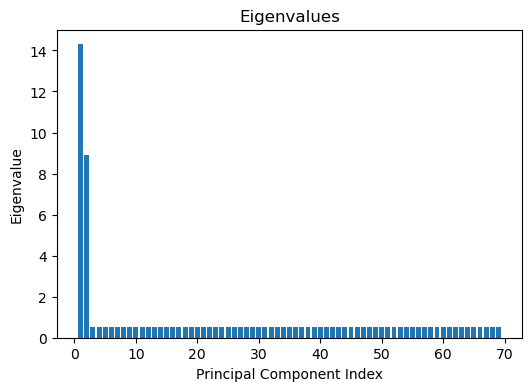

In [95]:
# Step 4: Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(pca.get_covariance())

# Plot Eigenvalues
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title('Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()